# A Single Variable Regressor

回帰(Regression)……入力変数と出力変数の間の関係を推定する処理。出力変数は連続の値をとる実数。


In [1]:
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_file  = 'const/data_singlevar_regr.txt'

In [3]:
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [4]:
regressor = linear_model.LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
y_pred = regressor.predict(X)

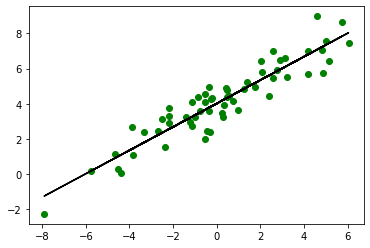

In [6]:
plt.scatter(X, y, c='green')
plt.plot(X, y_pred, color='black')
plt.show()

### モデルの性能を表す数値
* 絶対値誤差の平均値 (Mean absolute error)
* 二条誤差の平均値 (Mean square error)
* 絶対値誤差の中央値 (Median absolute error)
* 因子の寄与率 (Explain variance score)
* R2スコア (R2 score)

    回帰によって導いたモデルのあてはまりの良さを表現する値。0 <= r2 <= 1の値をとり、1に近いほどデータを適切に表現できている。

    R2スコアの目安
    * 0.6以下……モデルとして意味をなしていない。
    * 0.8付近……いいモデル！
    * 0.9以上……過学習を疑う。

In [7]:
print('** Liner regressor performance **')
print('Mean absolute error = ', round(sm.mean_absolute_error(y, y_pred), 2))
print('Mean squared error = ', round(sm.mean_squared_error(y, y_pred), 2))
print('Median absolute error = ', round(sm.median_absolute_error(y, y_pred), 2))
print('Explain variance score = ', round(sm.explained_variance_score(y, y_pred), 2))
print('R2 score = ', round(sm.r2_score(y, y_pred), 2))

** Liner regressor performance **
Mean absolute error =  0.65
Mean squared error =  0.62
Median absolute error =  0.56
Explain variance score =  0.86
R2 score =  0.86


### `pickle`

モデルの保存ができるモジュール。

* 保存……`pickle.dump`
* 復元……`pickle.load`

In [8]:
import pickle
# save a model
output_file = 'const/models/model.pkl'
with open(output_file, mode='wb') as f:
    pickle.dump(regressor, f)

In [9]:
# read the model
with open(output_file, mode='rb') as f:
    new_regressor = pickle.load(f)

y_pred_new = new_regressor.predict(X)

In [10]:
print('** Liner regressor performance **')
print('Mean absolute error = ', round(sm.mean_absolute_error(y, y_pred_new), 2))
print('Mean squared error = ', round(sm.mean_squared_error(y, y_pred_new), 2))
print('Median absolute error = ', round(sm.median_absolute_error(y, y_pred_new), 2))
print('Explain variance score = ', round(sm.explained_variance_score(y, y_pred_new), 2))
print('R2 score = ', round(sm.r2_score(y, y_pred_new), 2))

** Liner regressor performance **
Mean absolute error =  0.65
Mean squared error =  0.62
Median absolute error =  0.56
Explain variance score =  0.86
R2 score =  0.86


pickleの前後でモデルの性能が変わっていないことが確認できる。
